In [31]:
import numpy as np
import pandas as pd
import h5py
import random
import math
import matplotlib.pyplot as plt

In [185]:
def loadBGRImage(path):
    image = BGR(cv.imread(path))
    return image

def loadGreyImage(path):
    image = cv.imread(path, cv.IMREAD_GRAYSCALE)
    return image

def BGR(image):
    image = cv.cvtColor(image,cv.COLOR_RGB2BGR)
    return image

def displayGreyImage(image,imageName):
    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap='gray')
    plt.title(imageName)
    plt.show()
def displayGreyWindows(image,imageName):
    plt.figure(figsize=(3,3))
    plt.imshow(image, cmap='gray')
    plt.title(imageName)
    plt.show()
    
def displayBGRImage(image,imageName, size):
    plt.figure(figsize=(size,size))
    plt.imshow(image)
    plt.title(imageName)
    plt.show()
    
def displayBGRImageLarge(image,imageName):
    plt.figure(figsize=(18,18))
    plt.imshow(image)
    plt.title(imageName)
    plt.show()
    
def imageSideBySide(images,imageNames,size):
    row = np.ceil(len(images)/3)
    fig=plt.figure(figsize=(size, size))
    for i,image in enumerate(images):
        fig.add_subplot(row,3,i+1)
        plt.imshow(image, cmap='gray')
        plt.title("")
        #plt.title(imageNames[i])
    plt.show()

    

In [149]:
start = 25,26
size = 14,12
f = h5py.File('MNIST_synthetic.h5', 'r')
list(f.keys())

['test_dataset', 'train_dataset', 'train_labels']

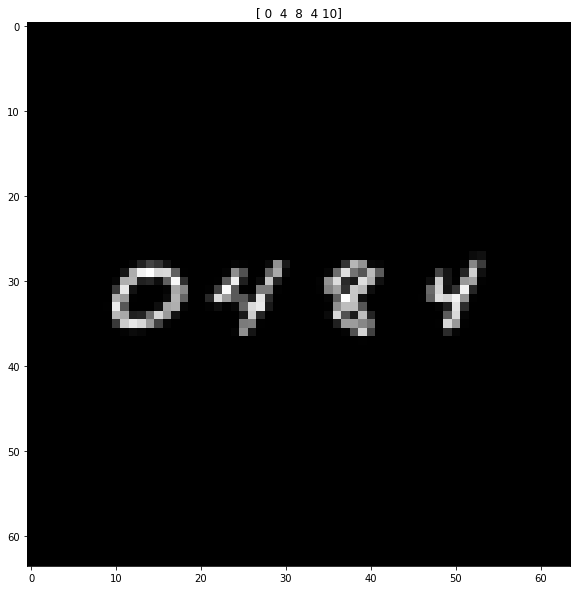

In [169]:
displayGreyImage(np.squeeze(np.array(f["train_dataset"]))[7],np.squeeze(f["train_labels"])[7])

In [151]:
print(np.squeeze(f["train_labels"])[3])
train_dataset = np.squeeze(np.array(f["train_dataset"])).copy()
train_labels = np.squeeze(np.array(f["train_labels"])).copy()

singulars_digit_list = []
singulars_label_list = []
for i, labels in enumerate(train_labels):
    if labels[1]==10:
        singulars_digit_list.append(train_dataset[i])
        singulars_label_list.append(train_labels[i])

[ 5  2  6 10 10]


In [170]:
singulars_digit = np.array(singulars_digit_list)     
print(len(train_dataset))
print(singulars_digit.shape)
print(len(singulars_label_list))

singulars_label = np.array(singulars_label_list).T[0]
for number in range(10):
    print(f"Amount of {number}: {list(singulars_label).count(number)}")

56000
(11247, 64, 64)
11247
Amount of 0: 1068
Amount of 1: 1214
Amount of 2: 1199
Amount of 3: 1184
Amount of 4: 1079
Amount of 5: 1017
Amount of 6: 1108
Amount of 7: 1222
Amount of 8: 1103
Amount of 9: 1053


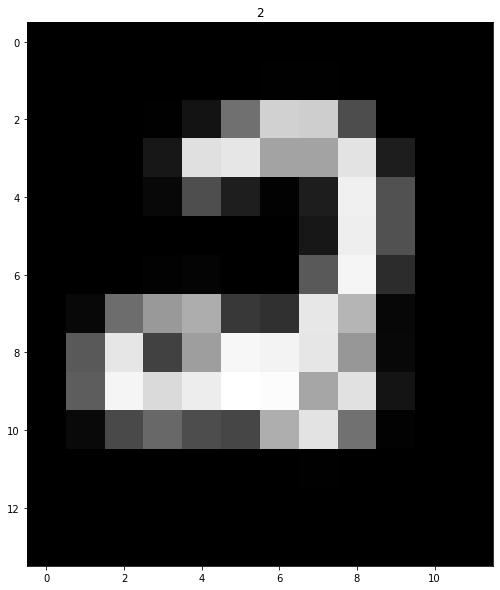

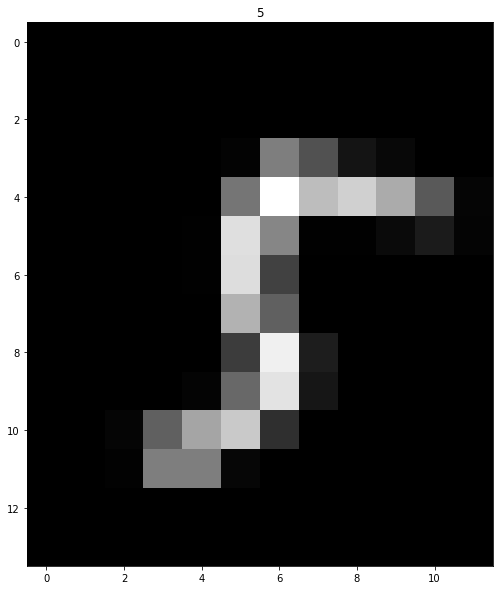

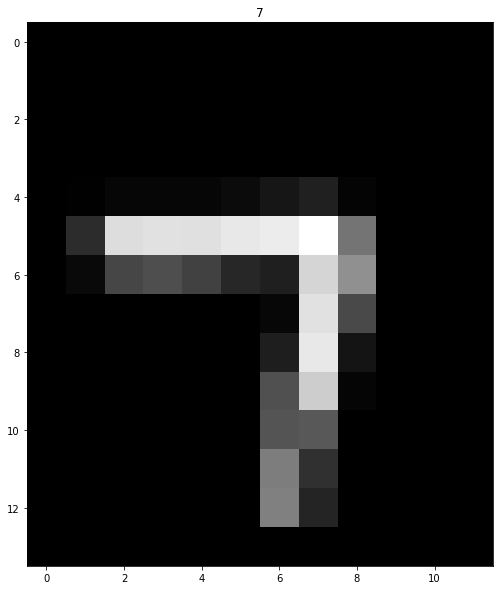

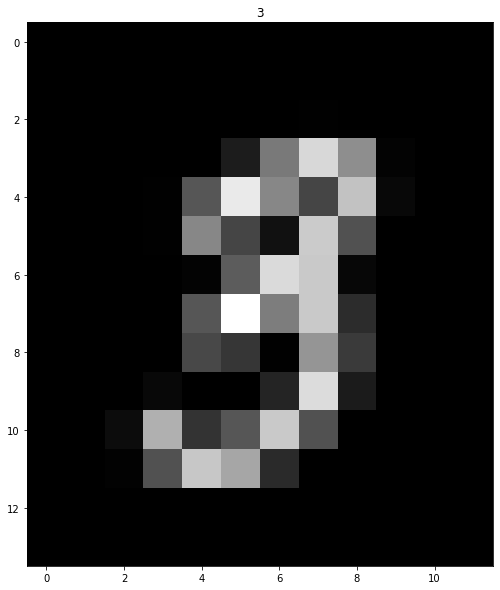

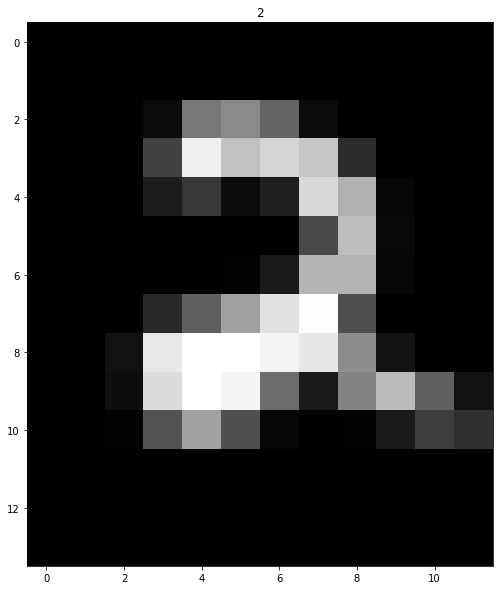

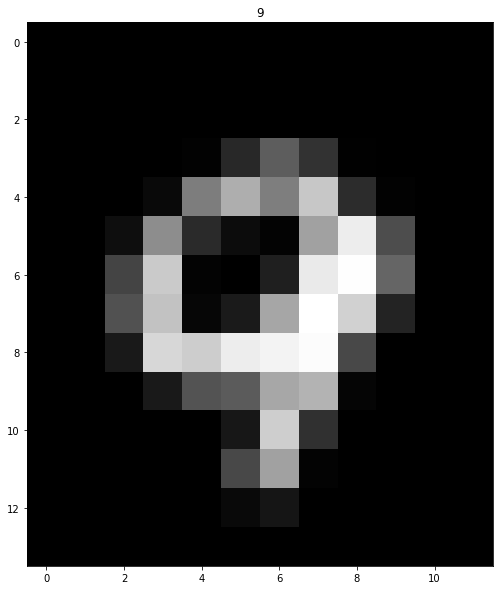

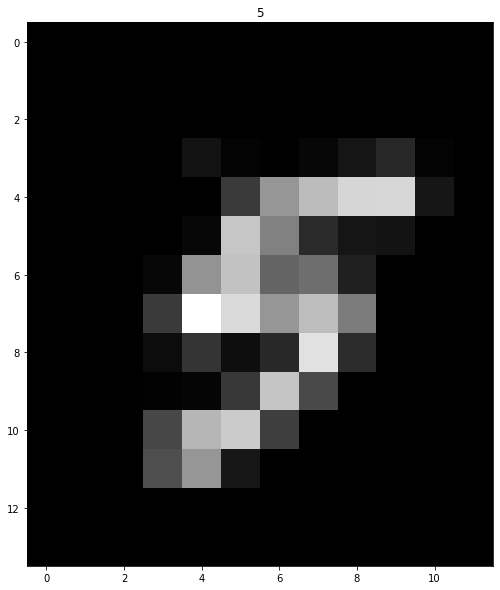

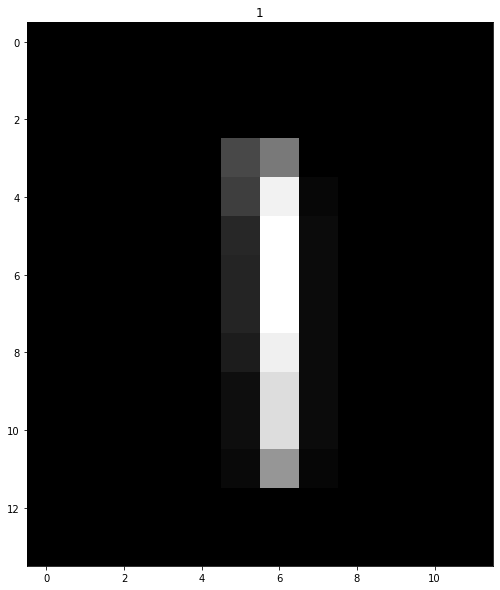

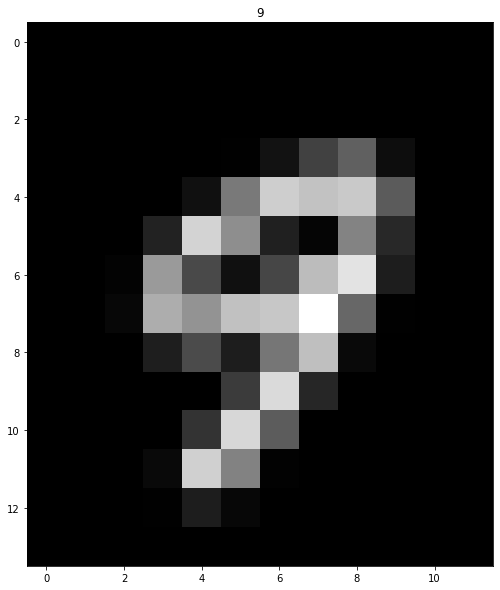

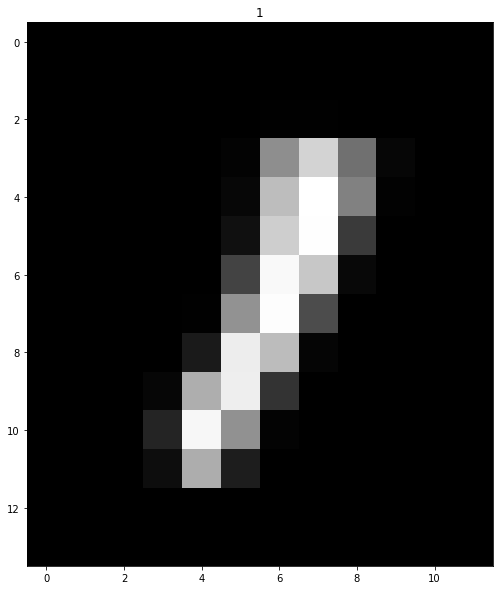

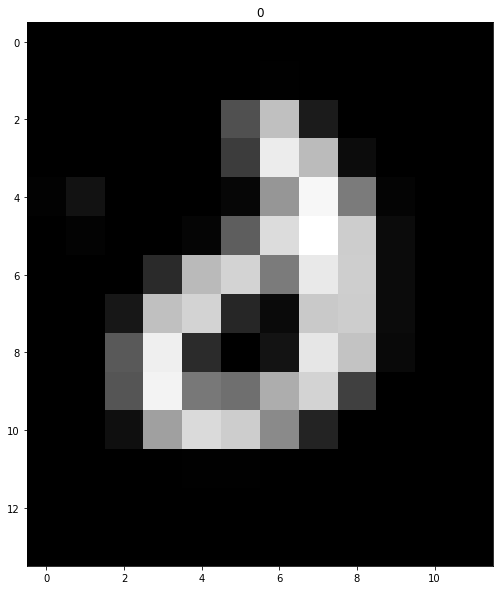

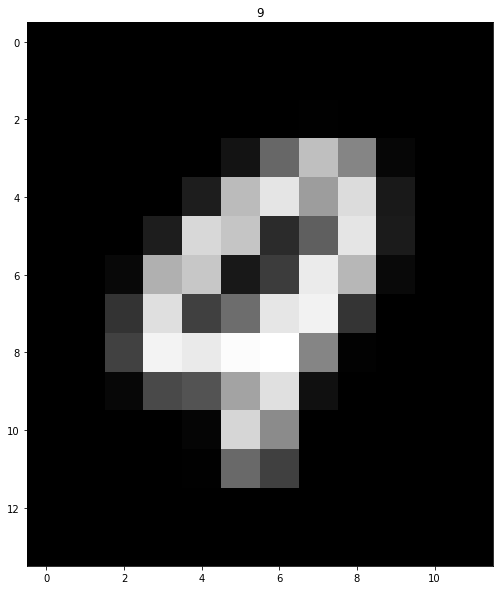

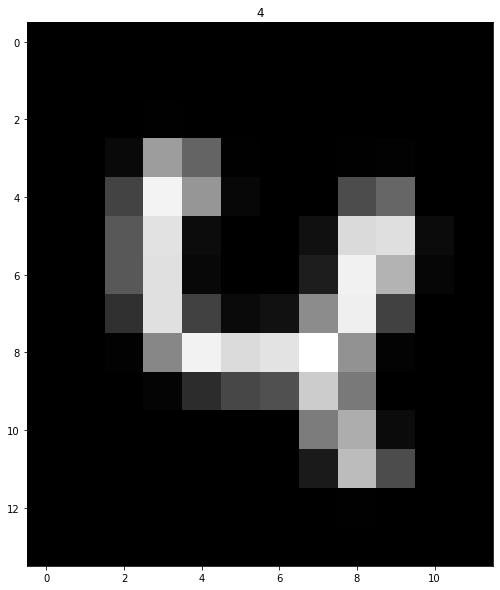

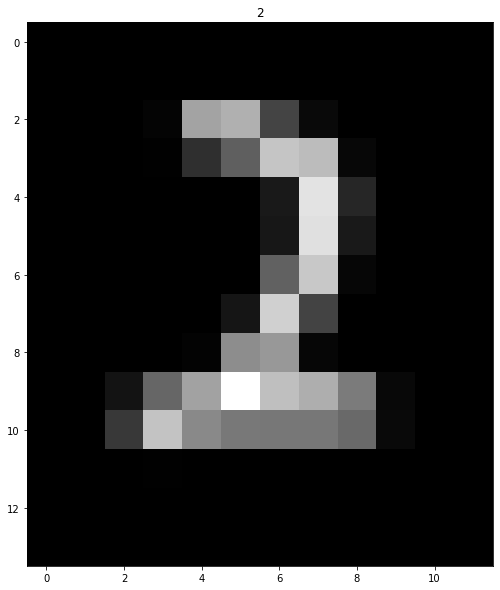

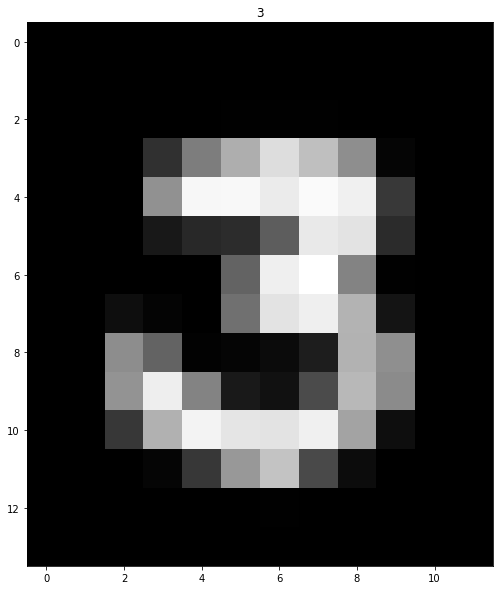

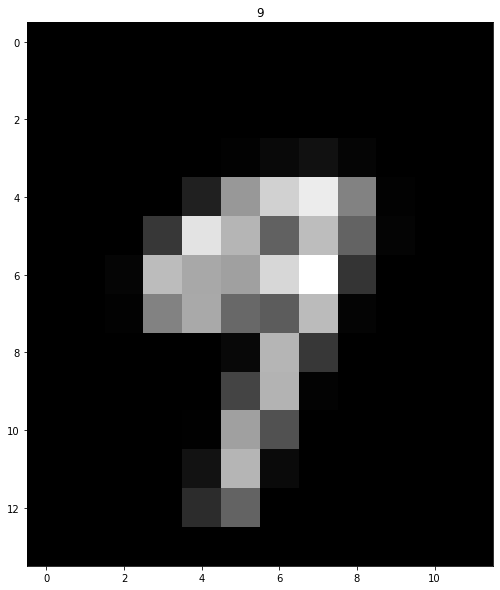

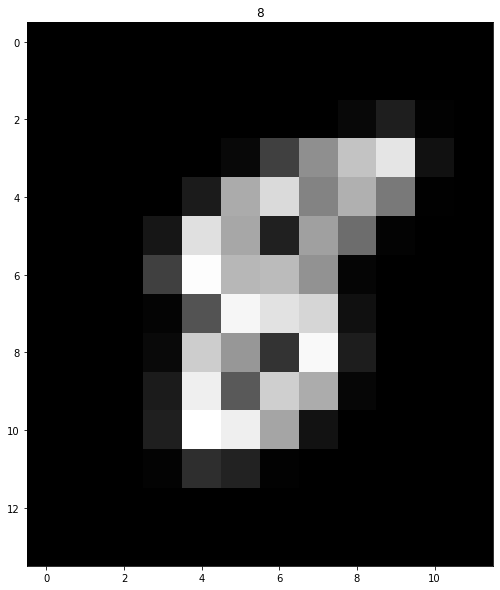

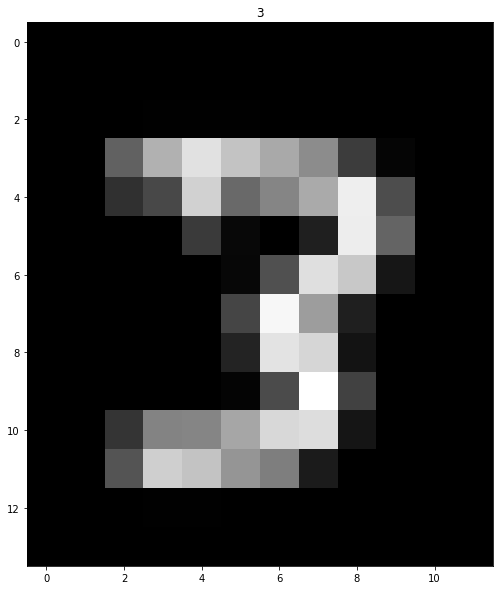

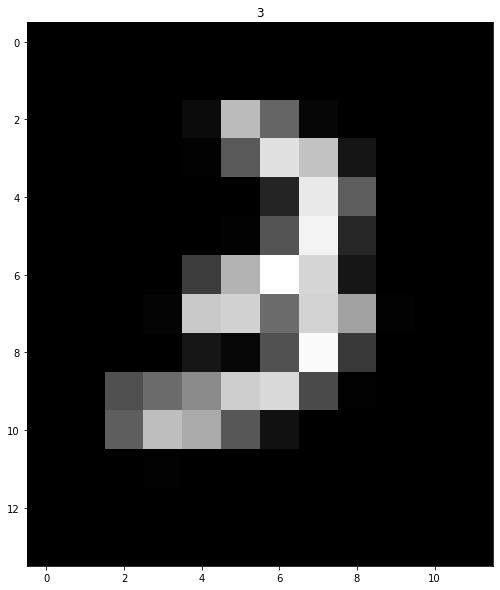

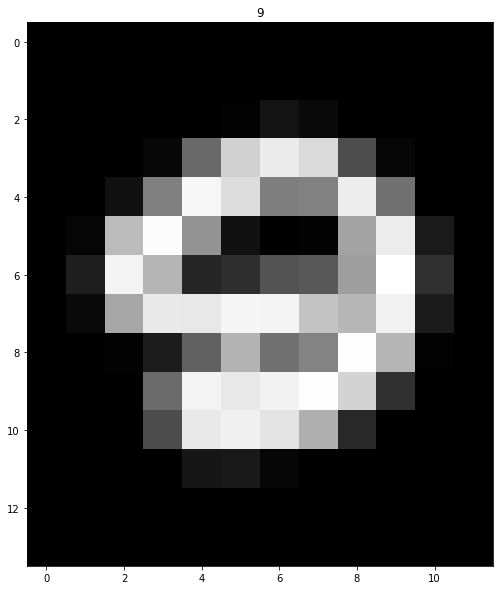

In [172]:
singular_dataset_focus = []
for i, digit in enumerate(singulars_digit):
    singular_dataset_focus.append(digit[25:39,26:38])

for i in range(20):
    displayGreyImage(singular_dataset_focus[i],singulars_label[i])
    

In [189]:
    
def make_windows(img,size):
    #border_patrol = int((size-1)/2)
    
    img_pad = img.copy()#img_pad = np.pad(img.copy(), ((border_patrol,border_patrol),(border_patrol,border_patrol)))   #pad image by the extra border to get zeros in the pixels surrounding the image
    l,w = img.shape
    windows95 = np.zeros(w-size[1],dtype=object)
    for i, row in enumerate(windows95):
            windows95[i] = img_pad[25:25+size[0],i:i+size[1]]                    #make image windows and insert them at the center i,j of the windows bitmap
    return windows95



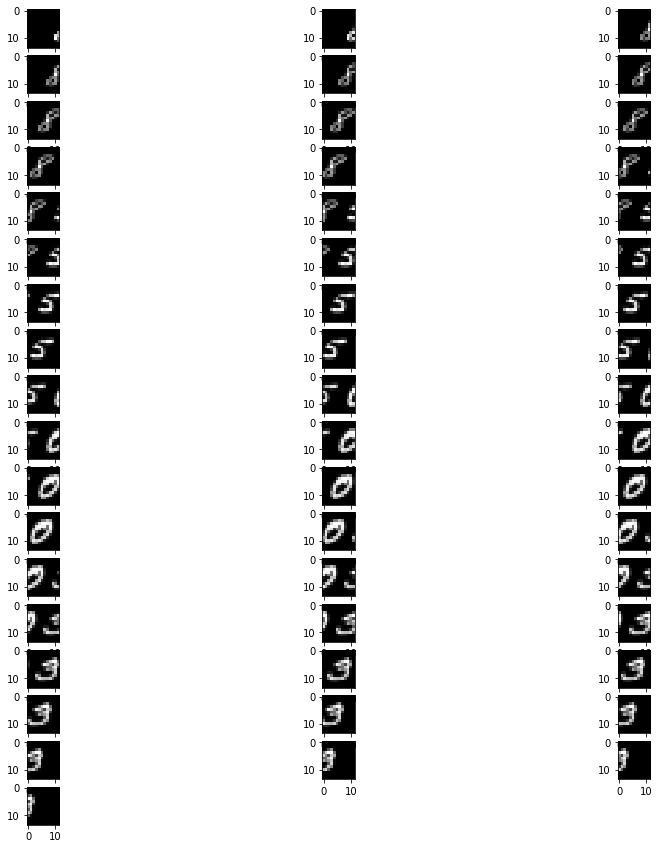

In [190]:
array = make_windows(train_dataset[0],(14,12))
imageSideBySide(array,"",15)




In [166]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.conv4 = nn.Conv2d(64, 64, 3)
        #self.flat = torch.flatten()
        self.fc1 = nn.Linear(4096 , 10)


    def forward(self, x):
        #print(x)
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = x.view(-1, 4096 )
        x = self.fc1(x)
        return x


net = Net()

In [167]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [165]:

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(singular_dataset_focus):
        # get the inputs; data is a list of [inputs, labels]
        inputs = data
        labels = singulars_label
        # zero the parameter gradients
        optimizer.zero_grad()
        print(torch.from_numpy(inputs).size())
        # forward + backward + optimize
        outputs = net(torch.from_numpy(inputs))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

torch.Size([14, 12])


RuntimeError: Expected 4-dimensional input for 4-dimensional weight [32, 1, 3, 3], but got 2-dimensional input of size [14, 12] instead